# Input data representation as 2D array of 3D blocks
> An easy way to represent input data to neural networks or any other machine learning algorithm in the form of 2D array of 3D-blocks

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [machine learning, jupyter, graphviz]
- image: images/array_visualiser/thumbnail.png
- search_exclude: false

---
Often while working with machine learning algorithms the developer has a good picture of how the input data looks like apart from knowing what the input data is. Also, most of the times the input data is usually represented or decribed with array terminology. Hence, this particular post is one such attempt to create simple 2D representations of 3D-blocks symbolising the arrays used for input.

[Graphviz](https://graphviz.readthedocs.io/en/stable/) a highly versatile graphing library that creates graphs based on DOT language is used to create the 2D array representation of 3D blocks with annotation and color uniformity to create quick and concise graphs/pictures for good explanations of input data used in various machine learning/deep learning algorithms.

In what follows is a script to create the 2D array representation og 3D blocks mainly intented for time-series data. The script facilitates some features which include-
* Starting at time instant 0 or -1
* counting backwards i.e. t-4 -> t-3 -> t-2 -> t-1 -> t-0 or counting forwards t-0 -> t-1 -> t-2 -> t-3 -> t-4 -> t-5

### Imports and global constants

In [1]:
import graphviz as G # to create the required graphs
import random        # to generate random hex codes for colors

FORWARDS = True   # to visualise array from left to right
BACKWARDS = False # to visualise array from right to left

### Properties of 2D representation of 3D array blocks
Main features/properties of the array visualisation needed are defined gere before actually creating the graph/picture.
1) Number of Rows: similar to rows in a matrix where each each row corresponds to one particular data type with data across different time instants arranged in columns

2) Blocks: which corresponds to the number of time instants in each row (jagged arrays can also be graphed)

3) Prefix: the annotation used to annotate each 3D block in the 2D array representation

In [2]:
ROW_NUMS = [1, 2] # Layer numbers corresponding to the number of rows of array data (must be contiguous)
BLOCKS = [3, 3] # number of data fields in each row i.e., columns in each row

diff = [x - ROW_NUMS[i] for i, x in enumerate(ROW_NUMS[1:])]
assert diff == [1]*(len(ROW_NUMS) - 1), '"layer_num" should contain contiguous numbers only'
assert len(ROW_NUMS) == len(BLOCKS), "'cells' list and 'layer_num' list should contain same number of entries"

direction = BACKWARDS        # control the direction of countdown of timesteps 
INCLUDE_ZERO = True         # for time series based data
START_AT = 0 if INCLUDE_ZERO else 1

# names = [['Softmax\nprobabilities', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10'],['', '       +', '       +', '       +', '       +', '       +', '       +'],['GMM\nprobabilities', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

# the trick to adding symbols like the "partial(dou)" i.e. '∂' is to write these symbols in a markdown cell using the $\partial$ utilising the mathjax support and
# copying the content after being rendered and paste in the code as a string wherever needed
prefix = ['∂(i)-', '∂(v)-']

In [3]:
r = lambda: random.randint(0,255)  # to generate random colors for each row 

# intantiate a directed graph with intial properties
dot = G.Digraph(comment='Matrix', 
                graph_attr={'nodesep':'0.02', 'ranksep':'0.02', 'bgcolor':'transparent'},
                node_attr={'shape':'box3d','fixedsize':'true', 'width':'1.1'})

for row_no in ROW_NUMS:
    if row_no != 1:
        dot.edge(str(row_no-1)+str(START_AT), str(row_no)+str(START_AT), style='invis') # invisible edges to contrain layout
    with dot.subgraph() as sg:
        sg.attr(rank='same')
        color = '#{:02x}{:02x}{:02x}'.format(r(),r(),r())
        for block_no in range(START_AT, BLOCKS[row_no-1]+START_AT):
            if direction:
                sg.node(str(row_no)+str(block_no), 't-'+str(block_no), style='filled', fillcolor=color)
            else:
                if START_AT == 0:
                    sg.node(str(row_no)+str(block_no), prefix[row_no-1]+str(BLOCKS[row_no-1]-block_no-1), style='filled', fillcolor=color)
                else:
                    sg.node(str(row_no)+str(block_no), prefix[row_no-1]+str(BLOCKS[row_no-1]-block_no-1), style='filled', fillcolor=color)    

### Render

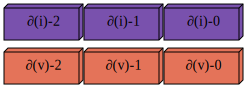

In [4]:
dot

### Save/Export

In [29]:
# dot.format = 'jpeg' # or PDF, SVG, JPEG, PNG, etc. 

In [220]:
# to save the file, pdf is default
dot.render('./lstm_input')

'./lstm_input.pdf'

### Additional script to just show the breakdown of train-test data of the dataset being used

In [18]:
import random
r = lambda: random.randint(0,255)  # to generate random colors for each row 

In [19]:
folders = G.Digraph(node_attr={'style':'filled'}, graph_attr={'style':'invis', 'rankdir':'LR'},edge_attr={'color':'black', 'arrowsize':'.2'})

In [20]:
color = '#{:02x}{:02x}{:02x}'.format(r(),r(),r())
with folders.subgraph(name='cluster0') as f:
    f.node('root', 'Dataset \n x2000', shape='folder', fillcolor=color)

In [21]:
color = '#{:02x}{:02x}{:02x}'.format(r(),r(),r())
with folders.subgraph(name='cluster1') as f:
    f.node('train', 'Train \n 1800', shape='note', fillcolor=color)
    f.node('test', 'Test \n x200', shape='note', fillcolor=color)

In [22]:
folders.edge('root', 'train')
folders.edge('root', 'test')

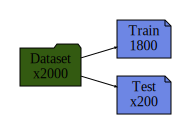

In [23]:
folders

In [24]:
folders.render('./dataset')

'./dataset.pdf'